In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
To: /content/requirements.txt
100% 424/424 [00:00<00:00, 1.94MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.1')

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import numpy as np


#отображение графиков в ноутбуке
%matplotlib inline

#для четкой прорисовки графиков - осторожно!!! Может съедать много памяти
#закоменьте эту строку, если это случилось
%config InlineBackend.figure_format = 'svg'

# ***Теперь задание:***


In [6]:
def nash_equilibrium(X: np.ndarray):
    from scipy.optimize import linprog

    I=np.array([1 for i in range(len(X))])
    res1 = linprog(I,A_ub=-X.T,b_ub=-I,method="highs")  #x
    res2 = linprog(-I,A_ub=X,b_ub=I,method="highs") #y
    g=-1/res2.fun
    G = I*g
    P = G*res1.x
    Q = G*res2.x
    return g,P,Q

In [7]:
a = np.array([[9,2,3,6,7,7],[4,6,7,5,9,5],[5,6,11,2,9,4],[8,4,3,3,7,9],[8,7,10,8,7,8],[9,5,6,7,8,10]])
b = np.array([[3, 3, 6, 8], [9, 10, 4, 2], [7, 7, 5, 4]])
c = np.array([[4, 2, 2], [2, 5, 0], [0, 2, 5]])
b = np.array([[-1, -2, 3], [2, 4, 1]])
# b = np.array([[4, 0, 6, 2, 2, 1], [3, 8, 4, 10, 4, 4], [1, 2, 6, 5, 0, 0], [6, 6, 4, 4, 10, 3], [10, 4, 6, 4, 0, 9], [10, 7, 0, 7, 9, 8]])
# a = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])
# a = np.array([[3, 1, 5], [1, 3, 3], [2, 2, 1]])

Равновесие Нэша в чистых стратегиях:
[[ 9  2  3  6  7  7]
 [ 4  6  7  5  9  5]
 [ 5  6 11  2  9  4]
 [ 8  4  3  3  7  9]
 [ 8  7 10  8  7  8]
 [ 9  5  6  7  8 10]]
V = 7.0
P = [ 0.  0. -0.  0.  1.  0.]
Q = [0. 1. 0. 0. 0. 0.]


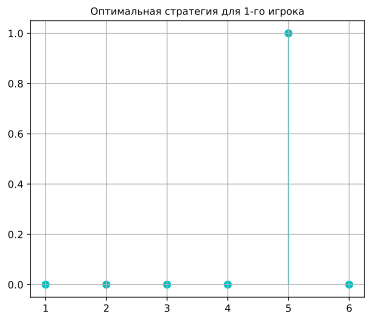

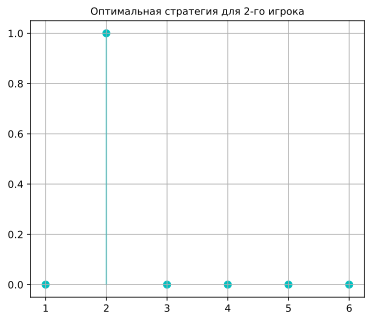

In [10]:
print("Равновесие Нэша в чистых стратегиях:")
print(a)
temp = nash_equilibrium(a)
print("V =", temp[0])
print("P =", temp[1])
print("Q =", temp[2])
x_vals = [x for x in range(1, len(temp[1]) + 1)]
y_vals = temp[1]
plt.figure(figsize = (6, 5))
plt.title("Оптимальная стратегия для 1-го игрока", fontsize = 10)
plt.grid(True)
plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
plt.show()

x_vals = [x for x in range(1, len(temp[2]) + 1)]
y_vals = temp[2]
plt.figure(figsize = (6, 5))
plt.title("Оптимальная стратегия для 2-го игрока", fontsize = 10)
plt.grid(True)
plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
plt.show()

Спектр оптимальной стратегии полон:
[[4 2 2]
 [2 5 0]
 [0 2 5]]
V = 2.5142857142857142
P = [0.54285714 0.17142857 0.28571429]
Q = [0.25714286 0.4        0.34285714]


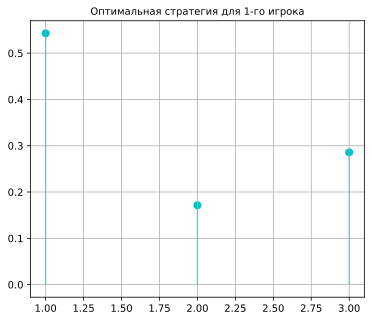

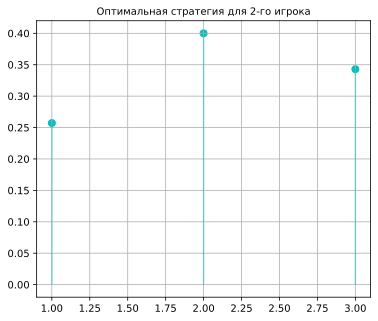

In [12]:
print("Спектр оптимальной стратегии полон:")
print(c)
temp = nash_equilibrium(c)
print("V =", temp[0])
print("P =", temp[1])
print("Q =", temp[2])
x_vals = [x for x in range(1, len(temp[1]) + 1)]
y_vals = temp[1]
plt.figure(figsize = (6, 5))
plt.title("Оптимальная стратегия для 1-го игрока", fontsize = 10)
plt.grid(True)
plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
plt.show()

x_vals = [x for x in range(1, len(temp[2]) + 1)]
y_vals = temp[2]
plt.figure(figsize = (6, 5))
plt.title("Оптимальная стратегия для 2-го игрока", fontsize = 10)
plt.grid(True)
plt.vlines(x_vals, ymin = 0, ymax = y_vals, color = "c", alpha = 0.4, linewidth = 1.5)
plt.scatter(x_vals, y_vals, marker = '.', s = 200, c = "c", alpha = 1)
plt.show()